In [1]:
from google.colab import drive 
drive.mount('/content/drive') 
import os 
os.chdir("/content/drive/My Drive/generative_models")

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import os 
import torch
import random 
import numpy as np
from train_evaluate import train_evaluate
from dataloader import get_dataloaders, get_retina_dataloaders
from models import MnistAutoencoder, CIFAR10Autoencoder, FashionMnistAutoencoder, RetinaAutoencoder

In [2]:
if os.path.exists("saved_models/") == False:
    os.mkdir("saved_models/")   

if os.path.exists("confusion_matrix/") == False:
    os.mkdir("confusion_matrix/")   


# For Mnist, FashionMnist, CIFAR10

In [3]:
epochs = 2
seed = 42
batch_size = 64 
test_size = 0.9 
dataset_name = "mnist"
model_path = "saved_models/"+dataset_name
image_path = "confusion_matrix/"+dataset_name+".png"
learning_rate  = 0.001


torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [4]:
mnist_class_lables = ["zero", "one","two","three","four","five","six","seven","eight","nine"]
fashion_mnist_class_lables = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
cifar10_class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

class_names = None
if dataset_name == "fashion_mnist":
    class_names = fashion_mnist_class_lables
if dataset_name == "mnist":
    class_names = mnist_class_lables
elif dataset_name == "cifar10":
    class_names = cifar10_class_labels


if dataset_name == "fashion_mnist":
    model = FashionMnistAutoencoder()
elif dataset_name == "mnist":
    model = MnistAutoencoder()
elif dataset_name == "cifar10":
    model = CIFAR10Autoencoder()

Training -- Epoch : 1 Iteration : 1 Loss : 0.21115
Training -- Epoch : 1 Iteration : 11 Loss : 0.19696
Training -- Epoch : 1 Iteration : 21 Loss : 0.09944
Training -- Epoch : 1 Iteration : 31 Loss : 0.08078
Training -- Epoch : 1 Iteration : 41 Loss : 0.07261
Training -- Epoch : 1 Iteration : 51 Loss : 0.07022
Training -- Epoch : 1 Iteration : 61 Loss : 0.07048
Training -- Epoch : 1 Iteration : 71 Loss : 0.06958
Training -- Epoch : 1 Iteration : 81 Loss : 0.06594
Training -- Epoch : 1 Iteration : 91 Loss : 0.06631
Training -- Epoch : 1 Iteration : 101 Loss : 0.06710
Training -- Epoch : 1 Iteration : 111 Loss : 0.06882
Training -- Epoch : 1 Iteration : 121 Loss : 0.06470
Training -- Epoch : 1 Iteration : 131 Loss : 0.06653
Training -- Epoch : 1 Iteration : 141 Loss : 0.06663
Training -- Epoch : 1 Iteration : 151 Loss : 0.06855
Training -- Epoch : 1 Iteration : 161 Loss : 0.06548
Training -- Epoch : 1 Iteration : 171 Loss : 0.06698
Training -- Epoch : 1 Iteration : 181 Loss : 0.06417
Trai

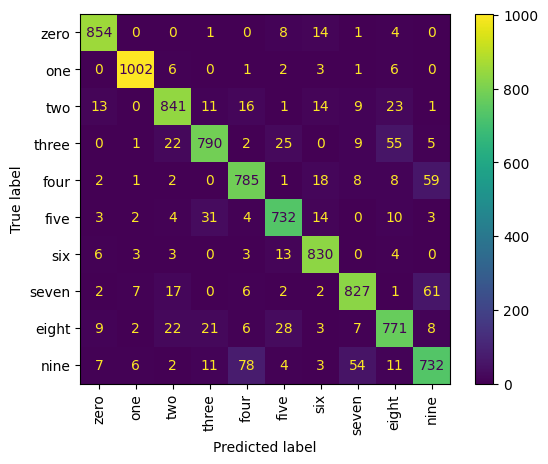

In [5]:
train_dataloader, val_dataloader, semi_train_dataloader, semi_test_dataloader = get_dataloaders(
                                                                                            batch_size = batch_size, 
                                                                                            test_size = test_size, 
                                                                                            seed = seed,
                                                                                            dataset_name = dataset_name)

train_evaluate(epochs = epochs,
                model_path = model_path,
                batch_size = batch_size,
                test_size = test_size,
                seed = seed,
                dataset_name = dataset_name,
                train_dataloader = train_dataloader,
                val_dataloader = val_dataloader,
                semi_train_dataloader = semi_train_dataloader,
                semi_test_dataloader = semi_test_dataloader,
                model = model,
                learning_rate = learning_rate,
                class_names= class_names,
                image_path = image_path)


# For RETINA Dataset

In [3]:
epochs = 2
seed = 42
batch_size = 64 
test_size = 0.5 
dataset_name = "retina"
model_path = "saved_models/"+dataset_name
image_path = "confusion_matrix/"+dataset_name+".png"
learning_rate  = 0.001


torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [4]:
train_dataloader, val_dataloader, semi_train_dataloader, semi_test_dataloader, class_names = get_retina_dataloaders(
                                                                                            batch_size = batch_size, 
                                                                                            test_size = test_size, 
                                                                                            seed = seed)


Training -- Epoch : 1 Iteration : 1 Loss : 0.19637
Training -- Epoch : 1 Iteration : 11 Loss : 0.12370
Training -- Epoch : 1 Iteration : 21 Loss : 0.10390
Validation -- Epoch : 1 Iteration : 1 Loss : 0.10183
Training -- Epoch : 2 Iteration : 1 Loss : 0.09280
Training -- Epoch : 2 Iteration : 11 Loss : 0.07316
Training -- Epoch : 2 Iteration : 21 Loss : 0.05920
Validation -- Epoch : 2 Iteration : 1 Loss : 0.08480


/Users/saadi/anaconda3/envs/fraunhofer/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saadi/anaconda3/envs/fraunhofer/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saadi/anaconda3/envs/fraunhofer/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


 For retina dataset f1_score : 0.24579 
 accuracy : 0.24579
 Classification report : 
               precision    recall  f1-score   support

          DR       0.17      0.02      0.03        55
        ARMD       0.00      0.00      0.00        15
          MH       0.44      0.35      0.39        43
          DN       0.00      0.00      0.00        16
         MYA       0.00      0.00      0.00        10
        BRVO       0.00      0.00      0.00        11
        TSLN       0.00      0.00      0.00        14
          LS       0.00      0.00      0.00         4
         CSR       0.00      0.00      0.00        10
         ODC       0.00      0.00      0.00        26
        CRVO       0.00      0.00      0.00         3
         ODP       0.00      0.00      0.00         7
         ODE       0.00      0.00      0.00        13
          RS       0.00      0.00      0.00         6
         CRS       0.00      0.00      0.00         2
         NDP       0.24      0.92      0.39    

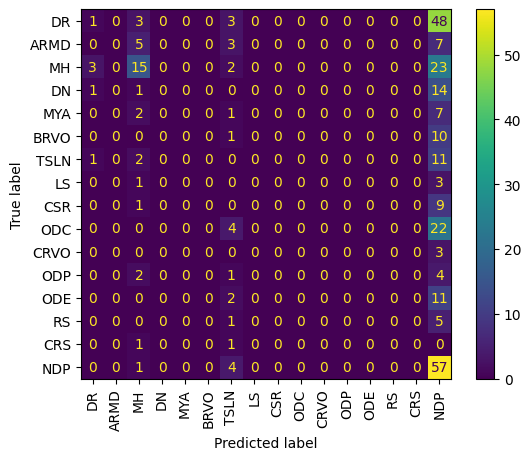

In [5]:
model = RetinaAutoencoder()
train_evaluate(epochs = epochs,
                model_path = model_path,
                batch_size = batch_size,
                test_size = test_size,
                seed = seed,
                dataset_name = dataset_name,
                train_dataloader = train_dataloader,
                val_dataloader = val_dataloader,
                semi_train_dataloader = semi_train_dataloader,
                semi_test_dataloader = semi_test_dataloader,
                model = model,
                learning_rate = learning_rate,
                class_names= class_names,
                image_path = image_path)